# **SALES PREDICTION USING PYTHON**

The objective of this project is to develop a predictive model that estimates product sales based on advertising expenditures across different channels (TV, Radio, and Newspaper). By analyzing the relationship between marketing investments and sales performance, the project aims to provide insights that can help businesses optimize their advertising budgets, maximize return on investment, and make data-driven decisions for future marketing strategies.

In [65]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


We begin by importing the necessary Python libraries:

NumPy & Pandas for numerical computations and data manipulation.

Matplotlib & Seaborn for data visualization.

Scikit-learn modules for model building, training, and evaluation.

  - `train_test_split`: To split data into training and test sets.  
  - `cross_val_score`: For model validation using cross-validation.  
  - `LinearRegression`: To build and train a Linear Regression model.  
  - `mean_absolute_error`, `mean_squared_error`, `r2_score`: To evaluate the performance of the model using different metrics.  


In [66]:
# Load the dataset
df = pd.read_csv('/content/advertising.csv')

In [67]:
# Get column headings
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [68]:
# Display the first few rows of the Dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Dataset contains information about advertising expenditure across different platforms (TV, Radio, Newspaper) and the corresponding Sales values.

In [69]:
df.shape

(200, 4)

The dataset contains **200 rows** and **4 columns**.  


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [71]:
# Handle missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [72]:
# Handle Duplicates
df.duplicated().sum()

np.int64(0)

In [73]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Insight: TV and Radio spends vary widely; Sales have moderate spread, which suits linear modeling.

info() - provides data types and null value checks, ensuring the dataset is clean.

describe() - gives summary statistics (mean, median, standard deviation, min, max, quartiles) to understand the data distribution.

This step helps identify any missing values, outliers, or data imbalances that may affect our model performance.

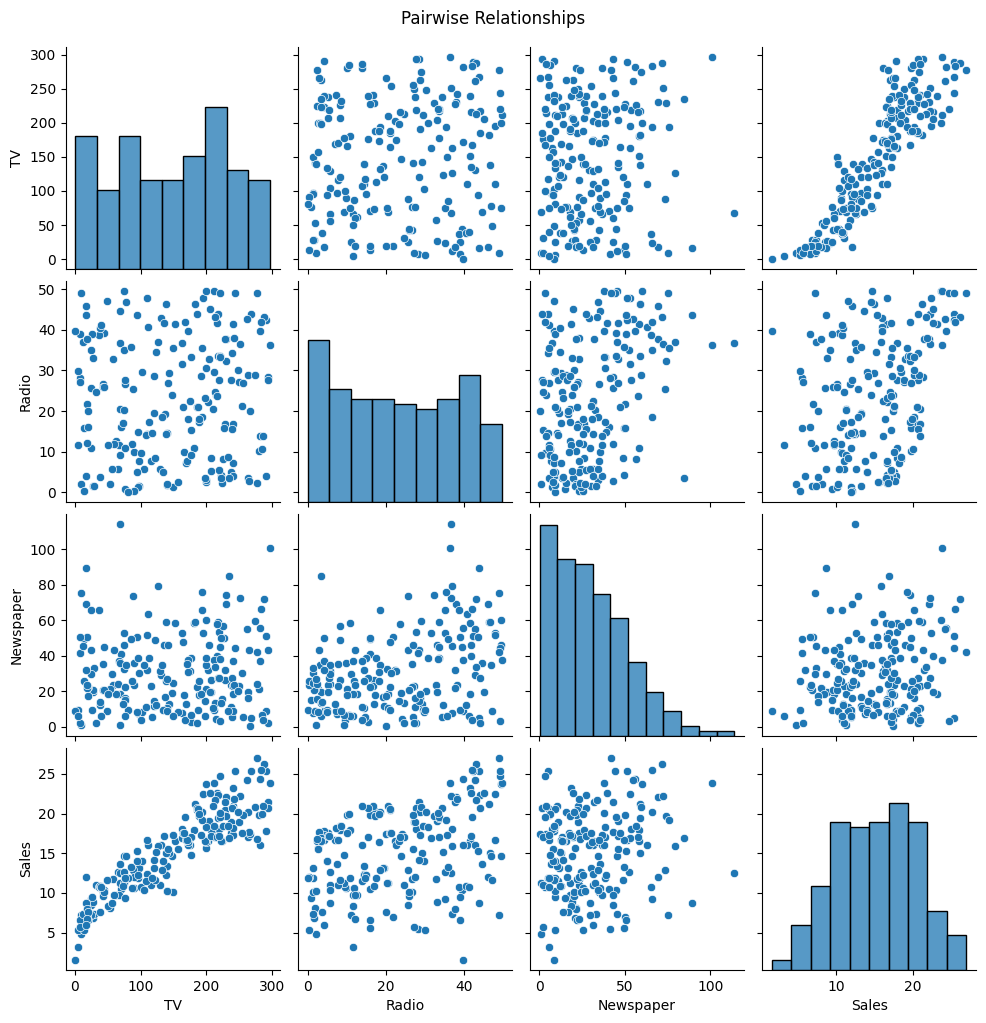

In [74]:
sns.pairplot(df, diag_kind='hist')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

### 🔍 Pairplot Insights
- **TV vs Sales**: Strong positive linear relationship → higher TV ad spend leads to higher sales.  
- **Radio vs Sales**: Moderate positive trend, though more scattered compared to TV.  
- **Newspaper vs Sales**: Very weak/unclear relationship → indicates Newspaper ads don’t strongly impact sales.  
- **Feature Distributions**:  
  - TV and Radio spend are fairly spread out.  
  - Newspaper spend is right-skewed (most values are low, with few very high).  
  - Sales are roughly normally distributed between 5–20 units.  


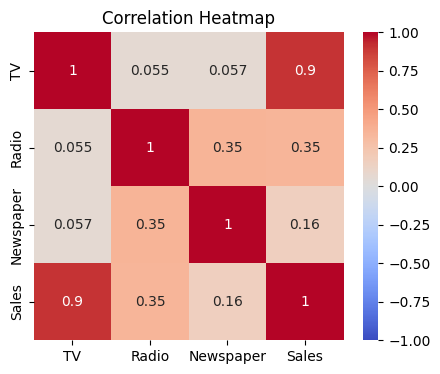

In [75]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

###  Correlation Heatmap Insights
- **TV vs Sales (0.90)** → Strongest positive correlation, showing TV ads are the biggest driver of sales.  
- **Radio vs Sales (0.35)** → Moderate positive correlation, indicating some influence of radio ads on sales.  
- **Newspaper vs Sales (0.16)** → Weak correlation, suggesting newspaper ads contribute very little to sales.  
- **Inter-feature Correlations**:  
  - Radio and Newspaper show some correlation (0.35).  
  - TV is almost independent of Radio and Newspaper (both ~0.05).  


In [76]:
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

Features (X): Independent variables → TV, Radio, Newspaper advertising spends.

Target (y): Dependent variable → Sales.

Goal is to train a model that maps the relationship between X and y.

In [77]:
#  Train/test split and baseline Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (160, 3)
Test shape: (40, 3)


### Train/Test Split and Baseline Model

To evaluate the performance of our machine learning model, we split the dataset into **training** and **testing** sets:

- **Training set (80%)** → Used to fit (train) the model.  
- **Testing set (20%)** → Used to evaluate how well the model generalizes to unseen data.  

We applied an **80/20 split** using `train_test_split()` with a fixed `random_state=42` to ensure reproducibility.  

**Output:**  
- Training set shape: **(160, 3)** → 160 samples with 3 features each.  
- Testing set shape: **(40, 3)** → 40 samples with 3 features each.  

This split ensures that the model learns patterns from the majority of the data while still being tested on a separate set to prevent overfitting.  



In [78]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [79]:
# Evaluate
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 1.2748262109549338
RMSE: 1.7052146229349223
R2: 0.9059011844150826


### Model Evaluation

After training the Linear Regression model, we need to evaluate its performance on the test dataset.  
We use several error metrics to understand how well the model predicts sales:

- **Mean Absolute Error (MAE):**  
  Represents the average of absolute differences between predicted and actual values.  
  A lower value indicates more accurate predictions.  

- **Mean Squared Error (MSE):**  
  Measures the average squared differences between predicted and actual values.  
  Squaring penalizes larger errors more heavily. Lower is better.  

- **Root Mean Squared Error (RMSE):**  
  The square root of MSE, which brings the error back to the same scale as the target variable (sales).  
  It provides an interpretable measure of prediction accuracy.  

- **R² Score (Coefficient of Determination):**  
  Explains the proportion of variance in the target variable (sales) that is predictable from the features.  
  - An R² score close to **1** indicates a strong fit.  
  - An R² of **0.9059** means that about **90.59% of the variance in sales** is explained by the model.  

**Evaluation Results:**  
- **MAE:** 1.27 → On average, predictions are off by ~1.27 sales units.  
- **RMSE:** 1.70 → Predictions deviate by ~1.70 units from actual sales, on average.  
- **R² Score:** 0.9059 → The model has a strong explanatory power, making it a good fit.  

✅ These results show that the model performs well in predicting sales and can be useful for guiding business decisions such as advertising budget allocation.


In [80]:
# Coefficients
coef_series = pd.Series(linreg.coef_, index=X.columns)
print('Intercept:', linreg.intercept_)
print('Coefficients:')
print(coef_series)

Intercept: 4.714126402214127
Coefficients:
TV           0.054509
Radio        0.100945
Newspaper    0.004337
dtype: float64


- The intercept (4.71) represents the baseline sales when advertising spend is zero.  
- For each additional unit spent on **TV advertising**, sales increase by **0.0545 units** (keeping other factors constant).  
- For each unit increase in **Radio advertising**, sales increase by **0.1009 units**.  
- **Newspaper advertising** has a very small effect (**0.0043**) compared to TV and Radio.

In [81]:
# 5-fold CV R2 for robustness
cv_scores = cross_val_score(linreg, X, y, cv=5, scoring='r2')
print('5-fold CV R2 mean:', cv_scores.mean())
print('5-fold CV R2 std:', cv_scores.std())

5-fold CV R2 mean: 0.8953723525274103
5-fold CV R2 std: 0.03141250965862172


## Cross-Validation (5-Fold)  

To ensure the robustness of the Linear Regression model, we performed **5-fold cross-validation** using the R² score.  

- **Mean R² Score:** 0.895  
- **Standard Deviation:** 0.031  

### Interpretation:  
- The high mean R² (~0.90) indicates that the model explains about **90% of the variance in sales**.  
- The low standard deviation (0.03) shows that the model’s performance is consistent across different folds, suggesting **good generalization ability**.  


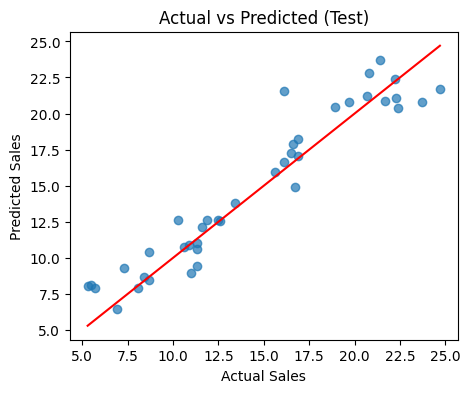

In [82]:
# Plot actual vs predicted
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted (Test)')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, color='red')
plt.show()


## 📈 Actual vs Predicted Plot

This plot helps to visualize how well the regression model predicts sales by comparing the **actual sales values** with the **predicted sales values**.  

- The **blue dots** represent the predicted values for the test dataset.  
- The **red diagonal line** represents the line of perfect prediction (where Actual = Predicted).  

### Key Observations:
- Most of the points lie close to the red line, which indicates that the model is performing well.  
- A tighter clustering of points around the diagonal shows **higher prediction accuracy**.  
- A few points deviate away from the line, suggesting the presence of **prediction errors or outliers**.  

✅ A strong model will have points closely aligned with the diagonal, showing that the predictions are consistent with the actual values.  


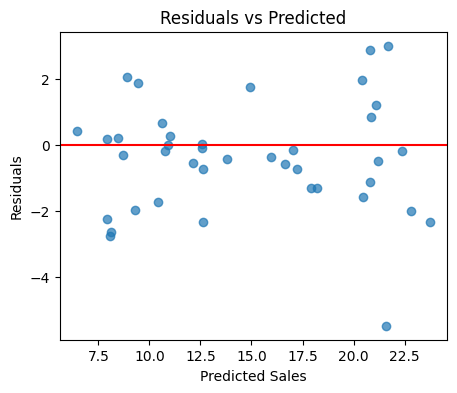

In [83]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(5,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

## 📊 Residual Plot

A **residual plot** is used to analyze the performance of a regression model by plotting the **residuals (errors)** against the **predicted values**.  

- **Residuals** = Actual Value - Predicted Value  
- The red horizontal line at **0** represents the ideal scenario where the predicted values perfectly match the actual values.  

### Key Observations:
- The residuals are scattered both above and below the zero line, which suggests that the errors are fairly balanced.  
- There is **no clear pattern** in the residuals, which indicates that the model captures the relationship well and assumptions of linear regression are reasonably satisfied.  
- However, some points lie further away from zero, suggesting the presence of **slight variability or outliers**.  

✅ A good regression model should ideally have residuals randomly scattered around zero, without forming any specific trend or curve.  
